### Importing the important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
data = pd.read_csv("dataset-of-10s.csv")

In [3]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


## Exploratory Data Analysis

### Checking for null values

In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6398 non-null   object 
 1   artist            6398 non-null   object 
 2   uri               6398 non-null   object 
 3   danceability      6398 non-null   float64
 4   energy            6398 non-null   float64
 5   key               6398 non-null   int64  
 6   loudness          6398 non-null   float64
 7   mode              6398 non-null   int64  
 8   speechiness       6398 non-null   float64
 9   acousticness      6398 non-null   float64
 10  instrumentalness  6398 non-null   float64
 11  liveness          6398 non-null   float64
 12  valence           6398 non-null   float64
 13  tempo             6398 non-null   float64
 14  duration_ms       6398 non-null   int64  
 15  time_signature    6398 non-null   int64  
 16  chorus_hit        6398 non-null   float64


Information of unique values in each feature

In [6]:
df.nunique()

track               5966
artist              3355
uri                 6378
danceability         882
energy              1066
key                   12
loudness            4704
mode                   2
speechiness         1114
acousticness        2668
instrumentalness    2302
liveness            1206
valence             1219
tempo               5531
duration_ms         5591
time_signature         5
chorus_hit          6241
sections              40
target                 2
dtype: int64

In [7]:
### Finding mean , meadian, min , max for all features

In [8]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


### Checking if the data is balanced or not

In [9]:
df.target.value_counts()

target
1    3199
0    3199
Name: count, dtype: int64

#### The data is balanced

### Getting insights of the data and its features

In [10]:
temp = df
temp=temp.drop(columns=['track','artist','uri'], errors='ignore')#removing String data types in temp to get correlation Matrix
temp

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000000,0.0828,0.7060,108.029,188493,4,41.18681,10,1
1,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814000,0.0946,0.2500,155.489,176880,3,33.18083,9,0
2,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000000,0.1080,0.2740,172.065,205463,4,44.89147,9,1
3,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000000,0.2040,0.2910,91.837,193043,4,29.52521,7,0
4,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000000,0.3910,0.7800,160.517,144244,4,24.99199,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,0.172,0.358,9,-14.430,1,0.0342,0.88600,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0
6394,0.910,0.366,1,-9.954,1,0.0941,0.09960,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1
6395,0.719,0.804,10,-4.581,1,0.0355,0.01320,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1
6396,0.600,0.177,7,-16.070,1,0.0561,0.98900,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0


### Lets find the correlations with a correlation matrix

<Axes: >

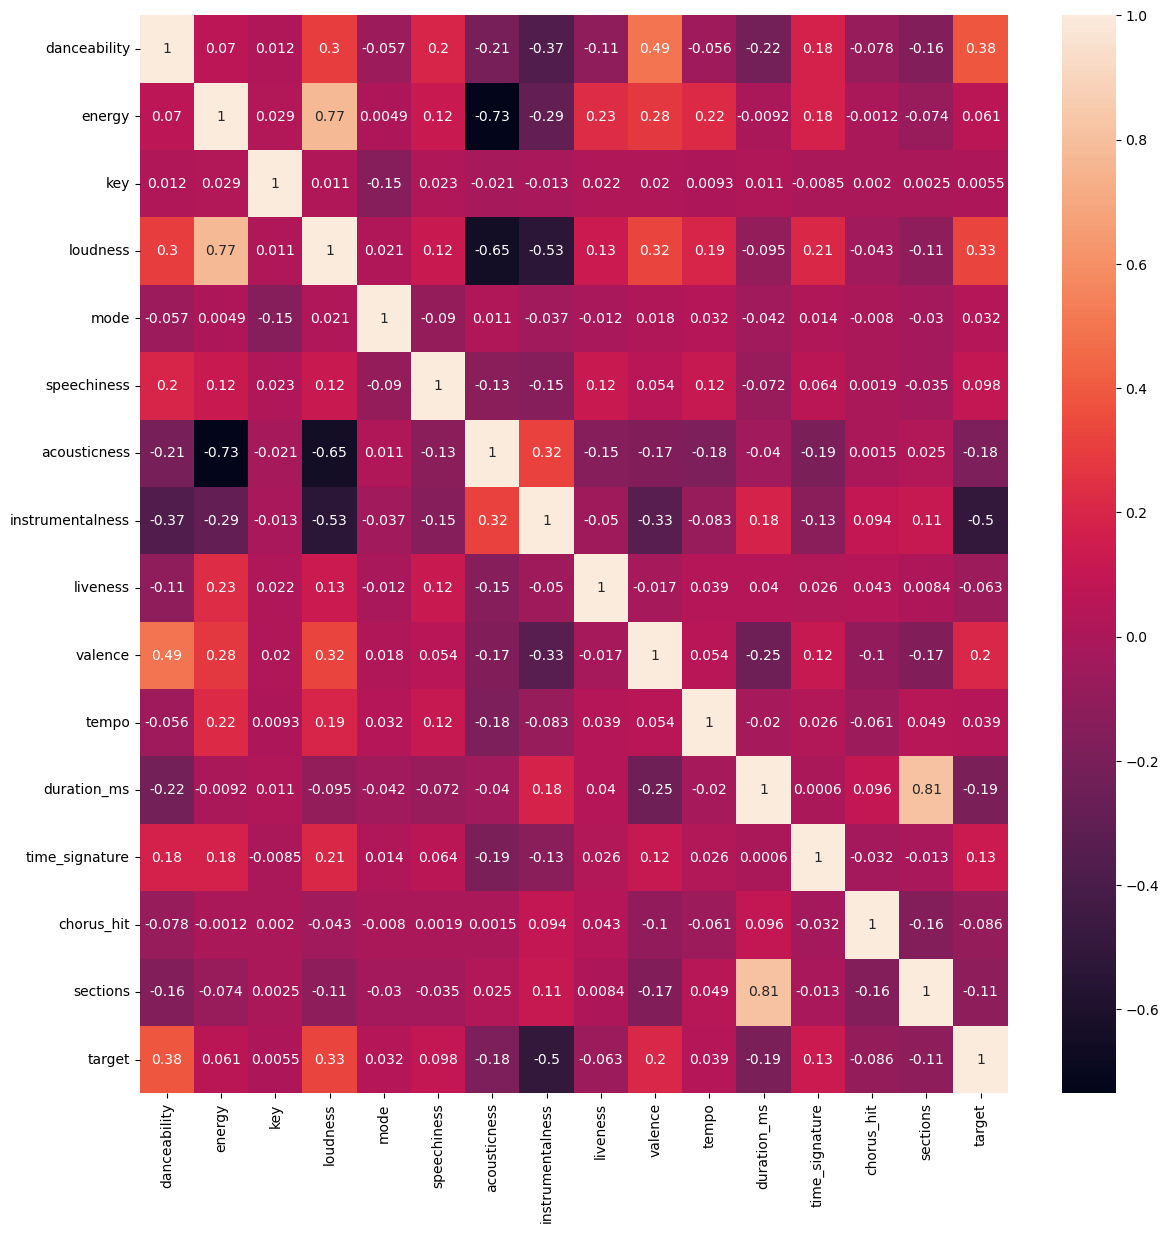

In [11]:
plt.figure(figsize=(14,14))
correl = temp.corr()
sns.heatmap(correl,annot=True)

In [12]:
correl

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.069645,0.012429,0.300576,-0.057280,0.200090,-0.206865,-0.371334,-0.107581,0.494136,-0.056197,-0.224803,0.178671,-0.078254,-0.162908,0.384486
energy,0.069645,1.000000,0.028703,0.774536,0.004929,0.119194,-0.734853,-0.288263,0.231393,0.281031,0.216886,-0.009228,0.175984,-0.001224,-0.074466,0.060701
key,0.012429,0.028703,1.000000,0.010824,-0.146063,0.022796,-0.021271,-0.013049,0.021785,0.019572,0.009259,0.011028,-0.008462,0.001960,0.002512,0.005548
loudness,0.300576,0.774536,0.010824,1.000000,0.021064,0.122028,-0.648717,-0.533671,0.126807,0.324985,0.194467,-0.094598,0.207436,-0.042665,-0.111469,0.327471
mode,-0.057280,0.004929,-0.146063,0.021064,1.000000,-0.090107,0.011424,-0.037132,-0.011590,0.018198,0.032180,-0.042125,0.014125,-0.007967,-0.030129,0.032021
speechiness,0.200090,0.119194,0.022796,0.122028,-0.090107,1.000000,-0.134226,-0.148649,0.121075,0.053836,0.117813,-0.071826,0.063656,0.001857,-0.035077,0.097783
acousticness,-0.206865,-0.734853,-0.021271,-0.648717,0.011424,-0.134226,1.000000,0.315563,-0.149926,-0.166253,-0.182050,-0.039567,-0.191607,0.001477,0.024583,-0.184479
instrumentalness,-0.371334,-0.288263,-0.013049,-0.533671,-0.037132,-0.148649,0.315563,1.000000,-0.049879,-0.334662,-0.083487,0.183696,-0.133629,0.093847,0.114927,-0.499624
liveness,-0.107581,0.231393,0.021785,0.126807,-0.011590,0.121075,-0.149926,-0.049879,1.000000,-0.016562,0.038555,0.040219,0.026185,0.043099,0.008406,-0.062612
valence,0.494136,0.281031,0.019572,0.324985,0.018198,0.053836,-0.166253,-0.334662,-0.016562,1.000000,0.053572,-0.248445,0.117049,-0.103274,-0.168675,0.203774


## Conclusion:
#### With respect to the target variable (hit or flop):
1. danceability, loudness, valence and time_signatures have a positive correlation
2. instrumentalness, acousticness, sections, duration_ms have a negative correlation

#### Loudness
1. Loudness has a strong positive correlation with energy
2. Loudness has a strong negative correlation with instrumentalness and acousticness

#### Acousticness
1. Acousticness is strongly negatively correlated with energy

#### Danceability
1. Danceability and valence are strongly positively correlated

### Seperate the categorical and numeric features

In [13]:
for col in df.columns:
 print(col)

track
artist
uri
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
duration_ms
time_signature
chorus_hit
sections
target


#### Conclusion:
Lets set the threshold of unique values in each feature to seperate them into categorical and numerical as 15


In [14]:
categorical = [x for x in df.columns if df[x].nunique()< 15]

#### The categorical features are:

In [15]:
categorical

['key', 'mode', 'time_signature', 'target']

Lets drop the features that are unique and do not have an impact on the target

In [16]:
df = df.drop(['track','artist','uri'],axis=1)

In [17]:
numeric = [x for x in df.columns if df[x].nunique() > 15]

#### Numeric Features

In [18]:
numeric

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'chorus_hit',
 'sections']

#### Conclusion:
We have successfully split the data in numeric and categorical features

### Let is visualize this data

### Categorical Features

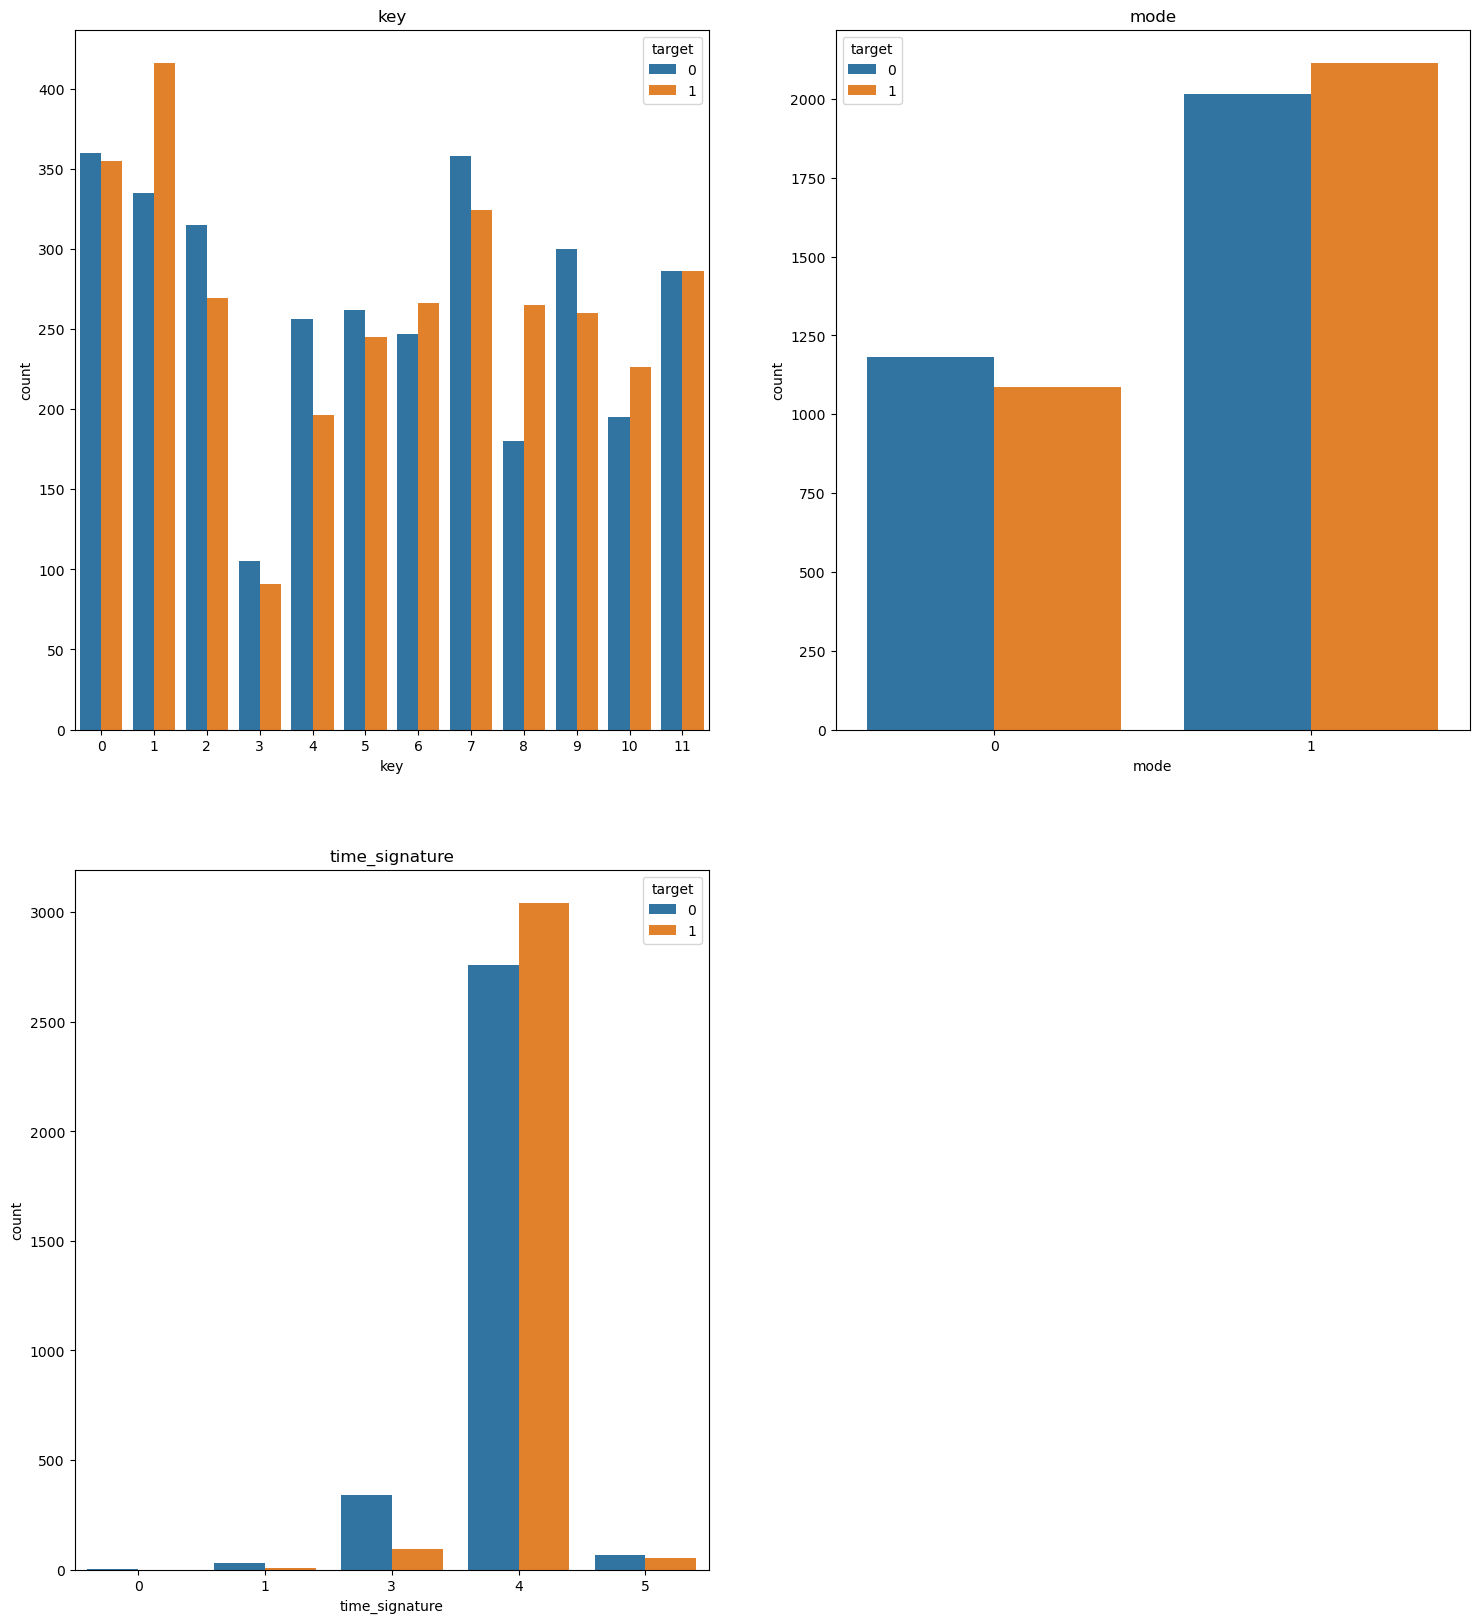

In [19]:
plt.figure(figsize=(18,20))
i = 1
for features in categorical[:-1]:
    plt.subplot(2,2,i)
    sns.countplot(x=df[features],hue=data.target).set_title(features)
    i=i+1
plt.show()

### Conclusion:
#### Key:
1. Hit : Songs with a key of 1,6,8,10 have a slightly higher chance of being a hit than other keys
2. Flop : Songs with a key of 2,4,7,9 have a slightly higher chance of being a flop than other keys

#### Mode:
1. 0 or Minor : Songs with the mode of 0 or 'Minor' have a slightly higher chance of being a flop
2. 1 or Major : Songs with the mode of 1 or 'Major' have a slightly higher chance of being a hit

#### Time Signature
1. Songs with 4 beats per bar are more frequent and have a higher chance of being a hit
2. Songs with any other number of beats per bar have a slightly higher chance of being a flop

### Numeric Features

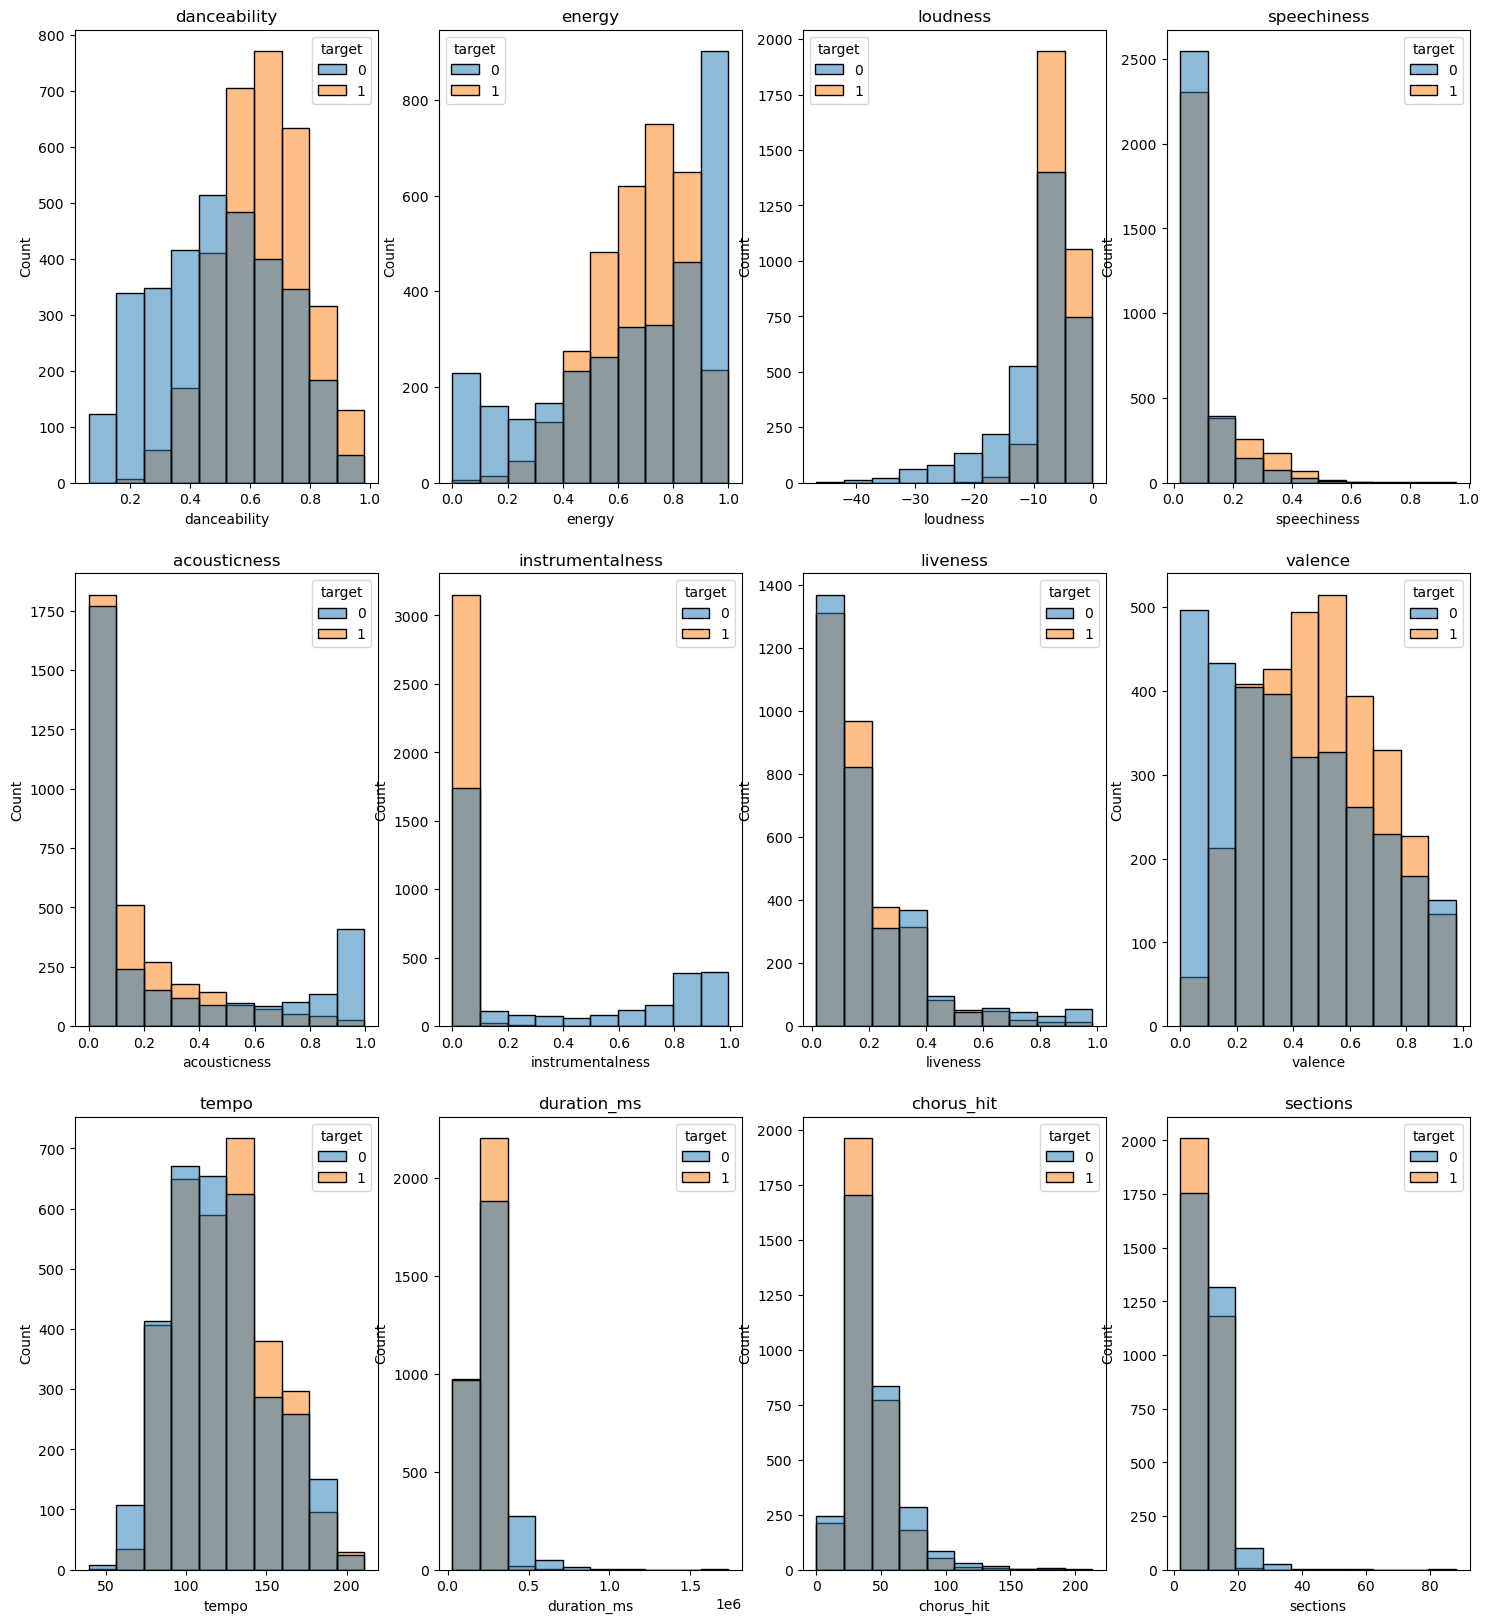

In [20]:
plt.figure(figsize=(18,20))
i = 1
for features in numeric:
    plt.subplot(3,4,i)
    sns.histplot(x=df[features],hue= df.target, bins=10).set_title(features)
    i=i+1
plt.show()

### Insights:
1. Danceability:
Songs with danceability in the range of 0.5 to 1 have a higher change of being a hit
2. Energy:
Songs with energy is the range of 0.4 to 0.9 have a higher chance of being a hit whereas songs with energy between 0.9 and 1 have a higher chance of being a flop

3. Loudness:
Songs with a loudness between -40 db to -12 db has a higher chance of being a flop

4. Instrumentalness:
Songs with instrumentalness between 0.0 to 0.10 have a higher chance of being a hit than any other range

5. Valence:
Songs with a valence in the range 0.5 to 1 have a higher chance of being a hit than other ranges

In [21]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target'],
      dtype='object')

## Splitting the data into dependent and independent features

In [22]:
X = df.drop('target',axis=1)

In [23]:
X.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections'],
      dtype='object')

In [24]:
y = df["target"]

## Splitting the data to train and test data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

### Model

In [27]:
from xgboost import XGBClassifier

In [28]:
classifier = XGBClassifier(
    use_label_encoder=False,

)


#### Lets import randomized Search Cross Validation too so we can perform hyperparameter tuning on XGBoost

In [29]:
from sklearn.model_selection import RandomizedSearchCV

#### Lets pass a range of parameters for the Randomized Search CV to take and select the best one for us

In [30]:
params = {
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]    ,

}

#### Passing these parameters to RandomizedSearchCV

In [31]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=-1,cv=5,verbose=3)

In [32]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

#### Lets see what parameters were selected by the Cross Validation Process

In [33]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
classifier= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, device='gpu',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [36]:
cross = cross_val_score(classifier,x_train,y_train,cv=10,verbose=0)


In [37]:
print("Accuracy after cross validation is:{}".format(cross.mean()*100))

Accuracy after cross validation is:84.27065496575341


### Lets Predict the values

In [38]:
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', multi_strategy=None, n_estimators=100,
              n_jobs=8, num_parallel_tree=1, random_state=0, ...)

In [39]:
y_pred = classifier.predict(x_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       634
           1       0.82      0.91      0.86       646

    accuracy                           0.85      1280
   macro avg       0.85      0.85      0.85      1280
weighted avg       0.85      0.85      0.85      1280



Text(50.722222222222214, 0.5, 'Predicted')

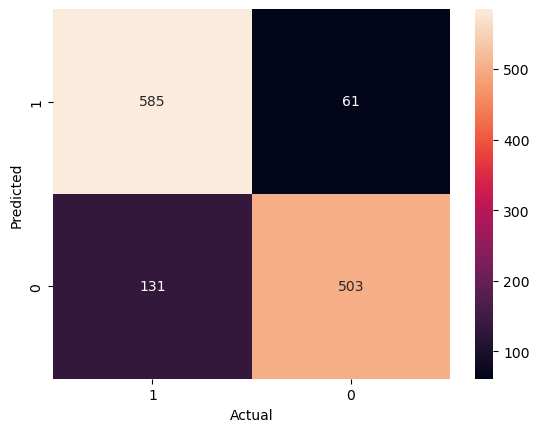

In [41]:
cm = confusion_matrix(y_test,y_pred)
rearranged_cm = [
    [cm[1][1], cm[1][0]],
    [cm[0][1], cm[0][0]]
]
sns.heatmap(rearranged_cm,annot=True,fmt="g",xticklabels=['1', '0'], yticklabels=['1', '0'])
plt.xlabel('Actual')
plt.ylabel('Predicted')

For XGBClassifier, we got the following reports while guessing a hit song:

#### Accuracy : 83%

#### Precision : 87%

#### Recall: 80%

### Dumping the model in that file

In [42]:
import joblib

Model making with XGB

In [43]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
               gamma=0.2, device='gpu',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [44]:
cross = cross_val_score(model,x_train,y_train,cv=10,verbose=0)

In [45]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', multi_strategy=None, n_estimators=100,
              n_jobs=8, num_parallel_tree=1, random_state=0, ...)

### Lets dump the model to joblib

In [46]:

joblib.dump(model,'spotifyXGB')

['spotifyXGB']

### Loading the model to make a test prediction

In [47]:
m = joblib.load('spotifyXGB')

In [48]:
y_new = m.predict(x_test)

In [49]:
y_new

array([0, 0, 1, ..., 1, 0, 0])

[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=15, min_child_weight=5;, score=0.913 total time=   0.7s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=15, min_child_weight=5;, score=0.904 total time=   0.8s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.914 total time=   0.6s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.901 total time=   0.6s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=5;, score=0.925 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.895 total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=15, min_child_weight=5;, score=0.904 total time=   0.7s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=1